In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.layers import CuDNNLSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

Using TensorFlow backend.


In [2]:
data = open(r'C:/Users/Abhishek/Desktop/Files/shakespeare.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

print("An example of input sequence",input_sequences[10])

In [3]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))

model.add(LSTM(100))

model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

W0106 00:52:29.415555 14296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x00000140D62A6438>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0106 00:52:29.417548 14296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x00000140D6F9F048>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0106 00:52:29.680428 14296 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x00000140D6F9FBE0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           319800    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1599)              161499    
_________________________________________________________________
dense_1 (Dense)              (None, 3198)              5116800   
Total params: 6,059,699
Trainable params: 6,059,699
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15514/15514 [==============================] - 7s 437us/sample - loss: 6.8829 - accuracy: 0.0219
Epoch 2/100
15514/15514 [==============================] - 5s 333us/sample - loss: 6.4837 - accuracy: 0.0209
Epoch 3/100
15514/15514 [==============================] - 6s 355us/sample - loss: 6.3866 - accuracy: 0.0231
Epoch 4/100
15514/15514 [==============================] - 5s 348us/sample - loss: 6.2655 - accuracy: 0.0272
Epoch 5/100
15514/15514 [==============================] - 5s 337us/sample - loss: 6.1610 - accuracy: 0.0340
Epoch 6/100
15514/15514 [==============================] - 5s 328us/sample - loss: 6.0730 - accuracy: 0.0374
Epoch 7/100
15514/15514 [==============================] - 5s 329us/sample - loss: 5.9891 - accuracy: 0.0405
Epoch 8/100
15514/15514 [==============================] - 5s 329us/sample - loss: 5.9043 - accuracy: 0.0448
Epoch 9/100
15514/15514 [==============================] - 5s 335us/sample - loss: 5.8051 - accuracy: 0.0501
Epoch 10/100
15514/

15514/15514 [==============================] - 5s 341us/sample - loss: 1.5718 - accuracy: 0.7278
Epoch 76/100
15514/15514 [==============================] - 5s 336us/sample - loss: 1.5473 - accuracy: 0.7344
Epoch 77/100
15514/15514 [==============================] - 5s 333us/sample - loss: 1.5154 - accuracy: 0.7364
Epoch 78/100
15514/15514 [==============================] - 5s 333us/sample - loss: 1.5077 - accuracy: 0.7391
Epoch 79/100
15514/15514 [==============================] - 5s 334us/sample - loss: 1.4745 - accuracy: 0.7453
Epoch 80/100
15514/15514 [==============================] - 5s 337us/sample - loss: 1.4711 - accuracy: 0.7471
Epoch 81/100
15514/15514 [==============================] - 5s 339us/sample - loss: 1.4511 - accuracy: 0.7493
Epoch 82/100
15514/15514 [==============================] - 5s 339us/sample - loss: 1.4352 - accuracy: 0.7526
Epoch 83/100
15514/15514 [==============================] - 5s 343us/sample - loss: 1.4288 - accuracy: 0.7542
Epoch 84/100
15514/1551

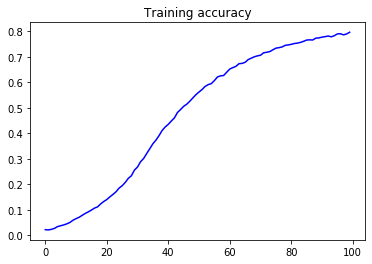

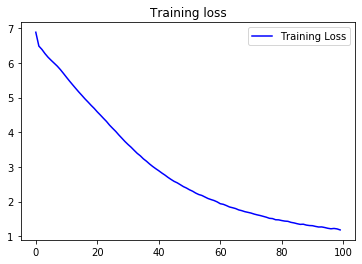

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope full too because thou catch life false in him for thine strong state or youth before thee last so young old treasure twain die one bright tongue life back was there more holy part or foes slow behind such out in one hell did west by him new light open wide slow sadly sadly burned ' kill me thence commend look so forsworn me him so great level still ill worth strong faith prove me more than youth in thee was down what sin still still slain grows doth about fade cold ' grew it was bettering youth still or
